In [1]:
# Import dependencies
import pandas as pd
import scipy.stats as st
import matplotlib
import csv
import os

In [2]:
data_df = pd.read_csv("listings1.csv")
data_df = data_df.drop("neighbourhood_group", axis = 1)
data_df = data_df.dropna()
#data_df.head()
index_price = data_df[data_df["price"] == 0 ].index
for x in range(len(index_price)):
    data_df.drop(index_price[x], inplace = True)
len(data_df)
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361


In [4]:
data_df['ownersposessions'] = data_df.groupby('host_id')['host_id'].transform('count')
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ownersposessions
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355,1
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334,5
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178,1
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180,3
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361,3


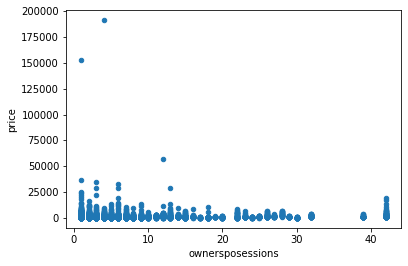

In [9]:
data_df.plot.scatter('ownersposessions', 'price')


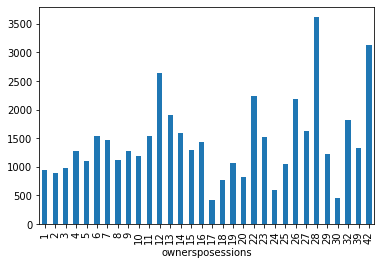

In [17]:
prex = data_df.groupby('ownersposessions')['price'].mean()
prex.plot.bar()

In [37]:

Alldeps = data_df.groupby(['name']).last()
Deps = Alldeps['id'].count()
Locations = data_df.groupby(['latitude','longitude']).last()
Locs = Locations['id'].count()
Total = data_df['id'].count()
print(f'El total de datos sin n/a son {Total} pero hay {Deps} deps con el mismo nombre aunque las locaciones que son {Locs}, parecen ser las mismas que el total')

El total de datos sin n/a son 14154 pero hay 13909 deps con el mismo nombre aunque las locaciones que son 14153, parecen ser las mismas que el total


In [8]:
Delegaciones = data_df.groupby(['neighbourhood']).agg(
                            Host_Offer = ('id','count'),
                            Avg_cost = ('price', 'mean'),
                           Total_Reviews = ('number_of_reviews', 'sum'),
                           Avg_dep_revs_per_month = ('reviews_per_month', 'mean'),
                            Avg_availability = ('availability_365','mean'),
                            
                            Most_commun_room_types_available = ('room_type', lambda x: pd.Series.mode(x)))
Delegaciones.sort_values(by='Host_Offer', ascending = False )

,Host_Offer,Avg_cost,Total_Reviews,Avg_dep_revs_per_month,Avg_availability,Most_commun_room_types_available
neighbourhood,,,,,,
Cuauhtémoc,6092,1180.172357,214528,2.058516,211.071241,Entire home/apt
Miguel Hidalgo,2281,1583.850504,58539,1.551320,208.459009,Entire home/apt
Benito Juárez,2221,709.439442,44894,1.452431,207.812247,Private room
Coyoacán,1176,749.586735,23746,1.329413,220.460034,Private room
Álvaro Obregón,589,871.967742,7985,1.072886,232.553480,Private room
Tlalpan,504,639.914683,5525,0.953135,242.291667,Private room
Cuajimalpa de Morelos,284,1207.482394,3235,0.946761,234.197183,Entire home/apt
Venustiano Carranza,261,598.318008,9940,2.865556,224.363985,Private room
Gustavo A. Madero,181,496.281768,4116,1.765635,236.856354,Private room


In [36]:
#It seems there is just 9031 diferent hosters, and some 


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ownersdeps,ownersposessions
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355,NaN,1
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334,NaN,5
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178,NaN,1
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180,NaN,3
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361,NaN,3


In [30]:
data_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ownersdeps
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,2019-05-27,0.52,9,355,NaN
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,2019-05-02,0.42,10,334,NaN
5,58955,Entire beautiful duplex in la Roma,282620,Nat,Cuauhtémoc,19.42292,-99.15775,Entire home/apt,1625,3,39,2019-05-28,0.43,1,178,NaN
6,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,Cuauhtémoc,19.41259,-99.17959,Private room,956,2,51,2019-04-05,2.55,3,180,NaN
7,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.41375,-99.17028,Entire home/apt,1816,2,39,2019-02-24,0.42,3,361,NaN


In [34]:
Hosters = data_df.groupby(['host_id']).count()
Hosters = Hosters.sort_values(by='id', ascending=False)
Monopoly = Hosters.loc[Hosters['id'] >= 2]

bins = [2,5,10,20,30,50]
labels = ['fortunate (2-5)', 'aspirationist (5-10)', 'entrepreneur(10-20)', 'professional (20-30)','capitalist(30 or more)']
Monopoly['SizeMonopolist'] = pd.cut(Monopoly['id'], bins, labels = labels, include_lowest = True)
Monopoly

# MonopolyLocated = Monopoly.groupby(['SizeMonopolist'])['id'].count()
# Monopoliescount = pd.DataFrame(MonopolyLocated)
# Monopoliescount

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ownersdeps,SizeMonopolist
host_id,,,,,,,,,,,,,,,,
4448934,43,43,43,43,43,43,43,43,43,43,43,43,43,43,0,capitalist(30 or more)
42700394,42,42,42,42,42,42,42,42,42,42,42,42,42,42,0,capitalist(30 or more)
10764020,42,42,42,42,42,42,42,42,42,42,42,42,42,42,0,capitalist(30 or more)
53361285,32,32,32,32,32,32,32,32,32,32,32,32,32,32,0,capitalist(30 or more)
27841247,32,32,32,32,32,32,32,32,32,32,32,32,32,32,0,capitalist(30 or more)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918335,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,fortunate (2-5)
77170301,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,fortunate (2-5)
216493164,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,fortunate (2-5)


,id
SizeMonopolist,
normal(1),8096
fortunate (2-5),717
aspirationist (5-10),153
entrepreneur(10-20),47
professional (20-30),13
capitalist(30 or more),5
